In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
df = pd.read_csv("IRCTC_Only_Data.csv")

# Check for non-numeric columns
print(df.dtypes)

# Drop non-numeric columns (e.g., Date column)
df = df.select_dtypes(include=[np.number])

# Ensure there are still enough columns left for training
if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for regression after removing non-numeric columns.")

# Selecting one numerical feature and target
X = df.iloc[:, [0]]  # First numerical column as feature
y = df.iloc[:, -1]   # Last numerical column as target

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model
reg = LinearRegression().fit(X_train, y_train)

# Predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Display results
print("Training Predictions (first 5):", y_train_pred[:5])
print("Testing Predictions (first 5):", y_test_pred[:5])


Date       object
Month      object
Day        object
Price     float64
Open      float64
High      float64
Low       float64
Volume     object
Chg%      float64
dtype: object
Training Predictions (first 5): [ 7.58395417e-04 -6.22262095e-05  2.51230120e-04  8.22751620e-04
  1.58830227e-03]
Testing Predictions (first 5): [0.00208714 0.00483013 0.00125724 0.00278193 0.00088743]


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load dataset
file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Selecting multiple numerical features (update with actual column names)
df = df.select_dtypes(include=[np.number])  # Keep only numeric columns

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for regression.")

X = df.iloc[:, :-1]  # All but the last column as features
y = df.iloc[:, -1]   # Last column as target

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
reg = LinearRegression().fit(X_train, y_train)

# Make predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Compute metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"Train - MSE: {mse_train}, RMSE: {rmse_train}, MAPE: {mape_train}, R²: {r2_train}")
print(f"Test - MSE: {mse_test}, RMSE: {rmse_test}, MAPE: {mape_test}, R²: {r2_test}")


           Date Month  Day    Price     Open     High      Low   Volume  \
0  Jun 29, 2021   Jun  Tue  2081.85  2092.00  2126.90  2065.05    1.67M   
1  Jun 28, 2021   Jun  Mon  2077.75  2084.00  2112.45  2068.40  707.73K   
2  Jun 25, 2021   Jun  Fri  2068.85  2084.35  2088.50  2053.10  475.82K   
3  Jun 24, 2021   Jun  Thu  2072.95  2098.00  2098.00  2066.00  541.51K   
4  Jun 23, 2021   Jun  Wed  2078.25  2102.00  2111.40  2072.00  809.62K   

     Chg%  
0  0.0020  
1  0.0043  
2 -0.0020  
3 -0.0026  
4 -0.0023  
Date      0
Month     0
Day       0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64
Train - MSE: 0.00016029562825525093, RMSE: 0.012660790980631935, MAPE: 86729111305.72256, R²: 0.6825093221256643
Test - MSE: 7.570134878405303e-05, RMSE: 0.00870065220452197, MAPE: 1.7462170486037891, R²: 0.8469135040630839


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Load dataset
file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

# Keep only numeric columns
df = df.select_dtypes(include=[np.number])

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for regression.")

# Selecting all attributes (features) except the last column as the target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Splitting the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression Model with multiple attributes
reg = LinearRegression().fit(X_train, y_train)

# Make predictions
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

# Compute metrics
def evaluate_model(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset_name} - MSE: {mse}, RMSE: {rmse}, MAPE: {mape}, R²: {r2}")

# Evaluate model on both train and test sets
evaluate_model(y_train, y_train_pred, "Train Set (Multiple Attributes)")
evaluate_model(y_test, y_test_pred, "Test Set (Multiple Attributes)")


Train Set (Multiple Attributes) - MSE: 0.00016029562825525093, RMSE: 0.012660790980631935, MAPE: 86729111305.72256, R²: 0.6825093221256643
Test Set (Multiple Attributes) - MSE: 7.570134878405303e-05, RMSE: 0.00870065220452197, MAPE: 1.7462170486037891, R²: 0.8469135040630839


In [11]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

df = df.select_dtypes(include=[np.number])

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for clustering.")

X = df.iloc[:, :-1]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_train)

print("Cluster Labels:", kmeans.labels_)
print("Cluster Centers:\n", kmeans.cluster_centers_)


Cluster Labels: [1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0
 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1
 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 0 1 0 0 1 1]
Cluster Centers:
 [[1826.87368421 1828.24671053 1860.15197368 1796.76776316]
 [1388.7995935  1389.25121951 1408.77764228 1373.57764228]]


In [12]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

df = df.select_dtypes(include=[np.number])

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for clustering.")

X = df.iloc[:, :-1]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42, n_init="auto").fit(X_train)

print("Silhouette Score:", silhouette_score(X_train, kmeans.labels_))
print("Calinski-Harabasz Score:", calinski_harabasz_score(X_train, kmeans.labels_))
print("Davies-Bouldin Score:", davies_bouldin_score(X_train, kmeans.labels_))


Silhouette Score: 0.7268530826433214
Calinski-Harabasz Score: 787.5705085594259
Davies-Bouldin Score: 0.4170255142694813


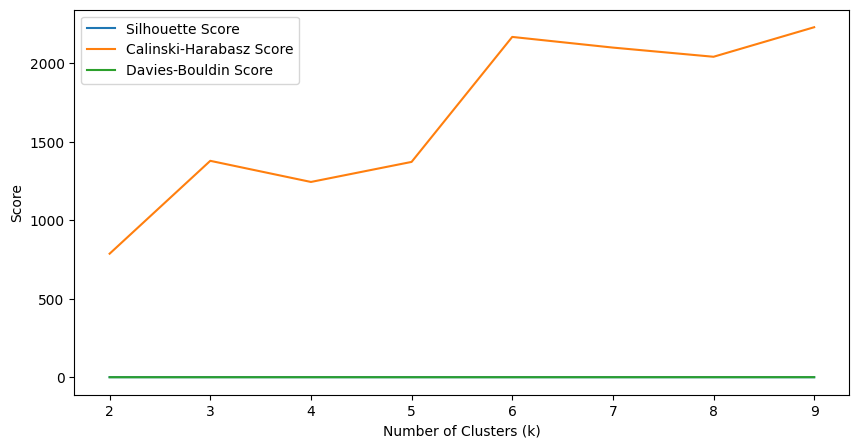

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

df = df.select_dtypes(include=[np.number])

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for clustering.")

X = df.iloc[:, :-1]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

k_values = range(2, 10)
sil_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    sil_scores.append(silhouette_score(X_train, kmeans.labels_))
    ch_scores.append(calinski_harabasz_score(X_train, kmeans.labels_))
    db_scores.append(davies_bouldin_score(X_train, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(k_values, sil_scores, label='Silhouette Score')
plt.plot(k_values, ch_scores, label='Calinski-Harabasz Score')
plt.plot(k_values, db_scores, label='Davies-Bouldin Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.legend()
plt.show()


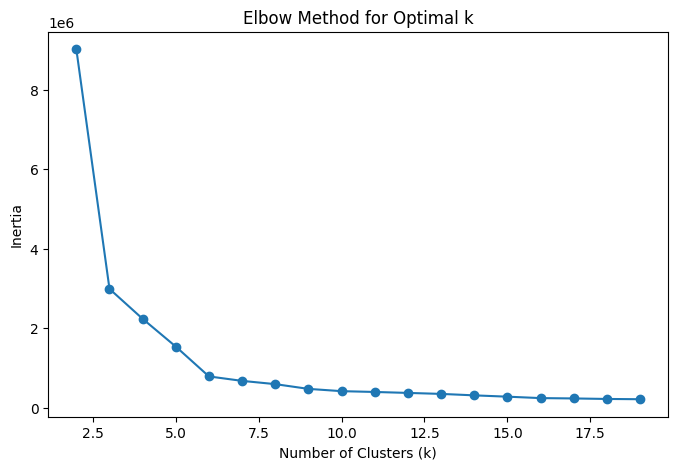

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

file_path = r"IRCTC_Only_Data.csv"
df = pd.read_csv(file_path)

df = df.select_dtypes(include=[np.number])

if df.shape[1] < 2:
    raise ValueError("Not enough numerical columns for clustering.")

X = df.iloc[:, :-1]

X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), distortions, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()
